In [1]:
import matplotlib.pyplot as plt
import pymongo
import numpy as np
import pandas as pd
import json
import re
import ast
import seaborn as sns
import matplotlib.dates as mdates
import itertools
#sns.set_style("white")

In [2]:
from collections import OrderedDict

In [3]:
df = pd.read_csv('DATA_CRAN/CRAN_DATA_20191231.csv', sep='|', low_memory=False)
df.shape

(91321, 39)

In [4]:
df['DatePublication'] = pd.to_datetime(df['Date/Publication'], utc=True).values.astype('M8[D]')

In [5]:
columns = ['Imports','Depends','Suggests','LinkingTo']
for col in columns:
    df[[col]] = df[[col]].applymap(lambda x: ast.literal_eval(x))

In [6]:
# Transforma columna a una lista
df[['Author']] = df[['Author']].applymap(lambda x: [x] if not isinstance(x, list) else x)

# Elimina los valores [nan]
df[['Author']] = df[['Author']].applymap(lambda x: [] if str(x) == "[nan]" else x)

In [7]:
df.head(5)

,Author,Authors@R,BugReports,Date,Date/Publication,Depends,Description,Encoding,Imports,LazyData,...,releases,DatePublication,Year/Publication,Month/Publication,Day/Publication,Year_Month/Publication,NumberOfImports,NumberOfDepends,NumberOfSuggests,NumberOfLinkingTo
0,[Scott Fortmann-Roe],NaN,NaN,2013-02-06,2013-02-07 10:00:27,"[xtable, pbapply]",This package supplies tools for tabulating and...,NaN,[],NaN,...,['2.15.3'],2013-02-07,2013,2,7,2013-02,0,2,2,0
1,[Scott Fortmann-Roe],NaN,NaN,2013-03-24,2013-03-26 19:58:40,"[R, xtable, pbapply]",This package supplies tools for tabulating and...,NaN,[],NaN,...,"['3.0.0', '3.0.1', '3.0.2', '3.0.3', '3.1.0', ...",2013-03-26,2013,3,26,2013-03,0,3,2,0
2,[Scott Fortmann-Roe],NaN,NaN,2015-08-15,2015-08-16 23:05:52,"[R, xtable, pbapply]",Supplies tools for tabulating and analyzing th...,NaN,[],NaN,...,[],2015-08-16,2015,8,16,2015-08,0,3,2,0
3,[Raja Sekhara Reddy D.M],NaN,NaN,NaN,2019-08-01 09:10:06 UTC,[R],"Given a protein multiple sequence alignment, i...",UTF-8,"[DT, networkD3, shiny, shinydashboard, magritt...",true,...,[],2019-08-01,2019,8,1,2019-08,9,1,2,0
4,[Raja Sekhara Reddy D.M],NaN,NaN,NaN,2019-11-09 16:20:02 UTC,[R],"Given a protein multiple sequence alignment, i...",UTF-8,"[DT, networkD3, shiny, shinydashboard, magritt...",true,...,[],2019-11-09,2019,11,9,2019-11,9,1,2,0


# Construcción grafo

In [8]:
df_lv = df.dropna(subset=['DatePublication']).copy()
df_lv.set_index(["Package"], inplace=True)
df_lv.sort_values('DatePublication', ascending=False, inplace=True)

In [9]:
df_lv.shape

(91321, 38)

In [10]:
df_ADJ = df_lv[['Version','Imports','Depends','LinkingTo', 'Year_Month/Publication']]
df_ADJ.head()

,Version,Imports,Depends,LinkingTo,Year_Month/Publication
Package,,,,,
slurmR,0.3-0,[utils],"[R, parallel]",[],2019-12
workflows,0.1.0,"[cli, ellipsis, generics, glue, hardhat, parsn...",[R],[],2019-12
multilinguer,0.0.3,"[sys, fs, usethis, zip, askpass, xml2, rvest, ...",[],[],2019-12
sbw,1.0,"[MASS, spatstat]","[R, Matrix, quadprog, slam]",[],2019-12
uavRst,0.5-4,"[raster, foreach]",[R],[Rcpp],2019-12


In [29]:
df_ADJ[df_ADJ.index.isin(['Matrix'])]

,Version,Imports,Depends,LinkingTo,Year_Month/Publication,all
Package,,,,,,
Matrix,1.2-18,"[methods, graphics, grid, stats, utils, lattice]",[R],[],2019-11,"[R, graphics, grid, lattice, methods, stats, u..."
Matrix,1.2-17,"[methods, graphics, grid, stats, utils, lattice]",[R],[],2019-03,"[R, graphics, grid, lattice, methods, stats, u..."
Matrix,1.2-16,"[methods, graphics, grid, stats, utils, lattice]",[R],[],2019-03,"[R, graphics, grid, lattice, methods, stats, u..."
Matrix,1.2-15,"[methods, graphics, grid, stats, utils, lattice]",[R],[],2018-11,"[R, graphics, grid, lattice, methods, stats, u..."
Matrix,1.2-14,"[methods, graphics, grid, stats, utils, lattice]",[R],[],2018-04,"[R, graphics, grid, lattice, methods, stats, u..."
Matrix,1.2-13,"[methods, graphics, grid, stats, utils, lattice]",[R],[],2018-04,"[R, graphics, grid, lattice, methods, stats, u..."
Matrix,1.2-12,"[methods, graphics, grid, stats, utils, lattice]",[R],[],2017-11,"[R, graphics, grid, lattice, methods, stats, u..."
Matrix,1.2-11,"[methods, graphics, grid, stats, utils, lattice]",[R],[],2017-08,"[R, graphics, grid, lattice, methods, stats, u..."
Matrix,1.2-10,"[methods, graphics, grid, stats, utils, lattice]",[R],[],2017-04,"[R, graphics, grid, lattice, methods, stats, u..."


In [11]:
def values_uniques(df):
    return np.unique(list(row.strip() for cols in df for row in cols))

df_ADJ['all'] = df_ADJ[['Imports', 'Depends', 'LinkingTo'][0:2]].apply(values_uniques, axis=1)
df_ADJ.head()

/home/mmora/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Version,Imports,Depends,LinkingTo,Year_Month/Publication,all
Package,,,,,,
slurmR,0.3-0,[utils],"[R, parallel]",[],2019-12,"[R, parallel, utils]"
workflows,0.1.0,"[cli, ellipsis, generics, glue, hardhat, parsn...",[R],[],2019-12,"[R, cli, ellipsis, generics, glue, hardhat, pa..."
multilinguer,0.0.3,"[sys, fs, usethis, zip, askpass, xml2, rvest, ...",[],[],2019-12,"[askpass, fs, rstudioapi, rvest, sys, usethis,..."
sbw,1.0,"[MASS, spatstat]","[R, Matrix, quadprog, slam]",[],2019-12,"[MASS, Matrix, R, quadprog, slam, spatstat]"
uavRst,0.5-4,"[raster, foreach]",[R],[Rcpp],2019-12,"[R, foreach, raster]"


# Construcción grafo

In [14]:
df_ADJ['Year_Month/Publication']

Package
slurmR                 2019-12
workflows              2019-12
multilinguer           2019-12
sbw                    2019-12
uavRst                 2019-12
fastmit                2019-12
Quartet                2019-12
robust                 2019-12
foreign                2019-12
blink                  2019-12
bigmemory              2019-12
set6                   2019-12
car                    2019-12
discretecdAlgorithm    2019-12
sparkhail              2019-12
ralger                 2019-12
ISOcodes               2019-12
BayesMFSurv            2019-12
phenesse               2019-12
MEDITS                 2019-12
olr                    2019-12
REDCapExporter         2019-12
rPAex                  2019-12
debar                  2019-12
RBaseX                 2019-12
mlr3proba              2019-12
MatrixEQTL             2019-12
speech                 2019-12
FSinR                  2019-12
slam                   2019-12
                        ...   
event                  1999-04


In [15]:
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta


def datespan(startDate, endDate, delta=timedelta(days=1)):
    currentDate = startDate
    while currentDate < endDate:
        yield currentDate
        currentDate += delta


In [16]:
meses = []

for day in datespan(date(1999, 1, 1), date(2020, 1, 1),delta=relativedelta(months=1)):
     meses.append(day.strftime('%Y-%m'))

In [17]:
meses[0]

'1999-01'

In [18]:
# Filtro el df por fecha
df_ADJ[df_ADJ['Year_Month/Publication'] <= meses[0]]

,Version,Imports,Depends,LinkingTo,Year_Month/Publication,all
Package,,,,,,
pls,0.1-1,[],[],[],1999-01,[]
quantreg,2.0-2,[],[],[],1999-01,[]
stable,0.2-1,[],[],[],1998-12,[]
pspline,NaN,[],[],[],1998-11,[]
logspline,NaN,[],[],[],1998-11,[]
akima,0.2-3,[],[],[],1998-08,[]
tripack,1.0-1,[],[],[],1998-08,[]
mda,0.1-1,[],[],[],1998-04,[]
oz,1.0-3,[],[],[],1998-02,[]


In [16]:
df_ADJ[df_ADJ['Year_Month/Publication'] <= meses[0]][df_ADJ[df_ADJ['Year_Month/Publication'] <= meses[0]].index.duplicated()]

,Version,Imports,Depends,LinkingTo,Year_Month/Publication,all
Package,,,,,,
ouch,1.0-2,[],[R],[],2004-10,[R]
Matching,0.48,[],"[R, MASS]",[],2004-10,"[MASS, R]"
tuneR,0.1-1,[],"[R, methods]",[],2004-10,"[R, methods]"
gstat,0.9-16,[],"[R, lattice]",[],2004-10,"[R, lattice]"
maptools,0.4-7,[],[R],[],2004-10,[R]
kernlab,0.3-1,[],[R],[],2004-10,[R]
maptools,0.4-6,[],[R],[],2004-10,[R]
R2HTML,1.4,[],[R],[],2004-10,[R]
gstat,0.9-15,[],"[R, lattice]",[],2004-10,"[R, lattice]"


In [19]:
def last_version_package_by_year(df):
    return df.iloc[[0]]

def cran_mensual(df, fecha):
    df = df[df['Year_Month/Publication'] <= fecha]
    df = df.groupby(level=[0], group_keys=False).apply(last_version_package_by_year)
    df = df.reset_index()
    return df

In [20]:
df_test = cran_mensual(df_ADJ,meses[0])
df_test.shape

(10, 7)

In [21]:
df_test.head()

,Package,Version,Imports,Depends,LinkingTo,Year_Month/Publication,all
0,akima,0.2-3,[],[],[],1998-08,[]
1,leaps,NaN,[],[],[],1997-12,[]
2,logspline,NaN,[],[],[],1998-11,[]
3,mda,0.1-1,[],[],[],1998-04,[]
4,oz,1.0-3,[],[],[],1998-02,[]


In [22]:
import networkx as nx

In [23]:
def construir_grafo(df_test):
    DG = nx.DiGraph()

    for index, row in df_test.iterrows():
        DG.add_node(row['Package'])
        for package in row['all']:
            DG.add_edge(row['Package'], package)
            
    return DG

In [24]:
df_test['Package'].values.tolist()

['akima',
 'leaps',
 'logspline',
 'mda',
 'oz',
 'pls',
 'pspline',
 'quantreg',
 'stable',
 'tripack']

In [23]:
lista_completa = []
for index, row in df_test.iterrows():
    for item in row['all']:
        lista_completa.append(item)

In [24]:
todos = list(set(lista_completa))

In [25]:
def returnNotMatches(a, b):
    return [[x for x in a if x not in b], [x for x in b if x not in a]]

In [26]:
returnNotMatches(todos, df_test['Package'].values.tolist())

[['lqs',
  'ts',
  'mva',
  'class',
  'MASS',
  'grDevices',
  'methods',
  'rpvm',
  'R',
  'ctest',
  'stats4',
  'nprq',
  'splines',
  'grid',
  'odesolve',
  'haplo_score',
  'syskern',
  'graphics',
  'nnet',
  'utils',
  'gdata',
  'requires rmutil library',
  'tcltk',
  'gtools',
  'stats'],
 ['AnalyzeFMRI',
  'Bhat',
  'BsMD',
  'CDNmoney',
  'CircStats',
  'DAAG',
  'DCluster',
  'Davies',
  'GenKern',
  'HI',
  'Hmisc',
  'HyperbolicDist',
  'ISwR',
  'KMsurv',
  'MCMCpack',
  'MNP',
  'MPV',
  'Matching',
  'NADA',
  'NISTnls',
  'Oarray',
  'PHYLOGR',
  'PTAk',
  'R2HTML',
  'R2WinBUGS',
  'RArcInfo',
  'RColorBrewer',
  'RCurl',
  'RMySQL',
  'RNetCDF',
  'ROracle',
  'RQuantLib',
  'RSQLite',
  'RSvgDevice',
  'RUnit',
  'RadioSonde',
  'RandomFields',
  'Rcmdr',
  'Rmpi',
  'Rwave',
  'SASmixed',
  'SIN',
  'SenSrivastava',
  'StatDataML',
  'SuppDists',
  'UNF',
  'UsingR',
  'VLMC',
  'Zelig',
  'ade4',
  'akima',
  'amap',
  'ash',
  'assist',
  'asypow',
  'aws',
 

In [29]:
#sorted(DG.in_degree, key=lambda x: x[1], reverse=True)

In [27]:
# Isolate the sequence of degrees
out_degree_sequence = list(DG.out_degree())

NameError: name 'DG' is not defined

In [28]:
avg_degree = np.mean(np.array(degree_sequence)[:,1].astype(np.float))

NameError: name 'degree_sequence' is not defined

In [111]:
avg_degree

1.1162790697674418

344

In [119]:
outd_m = []

for mes in meses:
    df_test = cran_mensual(df_ADJ,mes)
    DG = construir_grafo(df_test)
    out_degree_sequence = list(DG.out_degree())
    avg_degree = np.mean(np.array(out_degree_sequence)[:,1].astype(np.float))
    outd_m.append(avg_degree)
    
    

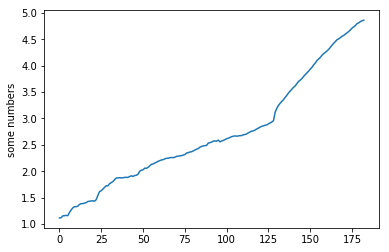

In [120]:
import matplotlib.pyplot as plt
plt.plot(outd_m)
plt.ylabel('some numbers')
plt.show()

In [25]:
# Hago un grafo mensual

for mes in meses:
    df_test = cran_mensual(df_ADJ,mes)
    DG = construir_grafo(df_test)
    nx.write_graphml_lxml(DG, "GRAPHS/" + mes + "_graph.graphml")